In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read in the Data

In [50]:
listings = pd.read_csv('listings.csv')
print(listings.shape)
listings.head()

(7575, 20)


,id,host_id,host_name,host_response_time,host_is_superhost,neighbourhood,latitude,longitude,room_type,price,security_deposit,cleaning_fee,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,958,1169,Holly,within a few hours,t,Western Addition,37.76931,-122.43386,Entire home/apt,$170.00,$100.00,$100.00,192,97.0,10.0,10.0,10.0,10.0,10.0,9.0
1,5858,8904,Philip And Tania,within a day,f,Bernal Heights,37.74511,-122.42102,Entire home/apt,$235.00,NaN,$100.00,111,98.0,10.0,10.0,10.0,10.0,10.0,9.0
2,7918,21994,Aaron,within a few hours,f,Haight Ashbury,37.76669,-122.45250,Private room,$65.00,$200.00,$50.00,17,85.0,8.0,8.0,9.0,9.0,9.0,8.0
3,8142,21994,Aaron,within a few hours,f,Haight Ashbury,37.76487,-122.45183,Private room,$65.00,$200.00,$50.00,8,93.0,9.0,9.0,10.0,10.0,9.0,9.0
4,8339,24215,Rosy,within an hour,f,Western Addition,37.77525,-122.43637,Entire home/apt,$685.00,$0.00,$225.00,27,97.0,10.0,10.0,10.0,10.0,10.0,9.0


# Clean the Data

The `price`, `security_deposit`, and `cleaning_fee` columns types need to be changed from the `object` type to a `float` type

In [51]:
listings.dtypes

id                               int64
host_id                          int64
host_name                       object
host_response_time              object
host_is_superhost               object
neighbourhood                   object
latitude                       float64
longitude                      float64
room_type                       object
price                           object
security_deposit                object
cleaning_fee                    object
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
dtype: object

In [52]:
columns = ['price', 'security_deposit', 'cleaning_fee']

for c in columns:
    listings[c] = listings[c].str.replace('$', '').str.replace(',','')
    listings[c] = listings[c].astype(float)
    
listings.dtypes[columns]

price               float64
security_deposit    float64
cleaning_fee        float64
dtype: object

The `host_response_time` column has some NaN values we will replace with `no response`.

In [53]:
listings['host_response_time'].value_counts(dropna=False)

within an hour        4303
within a few hours    1807
NaN                    772
within a day           616
a few days or more      77
Name: host_response_time, dtype: int64

In [54]:
listings['host_response_time'].fillna('no response', inplace=True)
listings['host_response_time'].value_counts(dropna=False)

within an hour        4303
within a few hours    1807
no response            772
within a day           616
a few days or more      77
Name: host_response_time, dtype: int64

The `host_is_superhost` values of `t` and `f` will be changed to `1` and `0`, respectively. 

In [55]:
listings['host_is_superhost'].value_counts(dropna=False)

f    4471
t    3104
Name: host_is_superhost, dtype: int64

In [56]:
listings['host_is_superhost'].replace({'t':1, 'f':0}, inplace=True)
listings['host_is_superhost'].value_counts(dropna=False)

0    4471
1    3104
Name: host_is_superhost, dtype: int64

The `security_deposit`, `cleaning_fee`, `review_scores_rating`, `review_scores_accuracy`,	`review_scores_cleanliness`, `review_scores_checkin`, `review_scores_communication`, `review_scores_location`, `review_scores_value` columns contain `NaN` values that will be replaced with `0`. 

In [57]:
listings.columns[listings.isna().any()]

Index(['security_deposit', 'cleaning_fee', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value'],
      dtype='object')

In [58]:
na_columns = listings.columns[listings.isna().any()].tolist()

for c in na_columns:
    listings[c].fillna(0, inplace=True)

In [59]:
listings.columns[listings.isna().any()]

Index([], dtype='object')

In [60]:
listings.head()

,id,host_id,host_name,host_response_time,host_is_superhost,neighbourhood,latitude,longitude,room_type,price,security_deposit,cleaning_fee,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,958,1169,Holly,within a few hours,1,Western Addition,37.76931,-122.43386,Entire home/apt,170.0,100.0,100.0,192,97.0,10.0,10.0,10.0,10.0,10.0,9.0
1,5858,8904,Philip And Tania,within a day,0,Bernal Heights,37.74511,-122.42102,Entire home/apt,235.0,0.0,100.0,111,98.0,10.0,10.0,10.0,10.0,10.0,9.0
2,7918,21994,Aaron,within a few hours,0,Haight Ashbury,37.76669,-122.45250,Private room,65.0,200.0,50.0,17,85.0,8.0,8.0,9.0,9.0,9.0,8.0
3,8142,21994,Aaron,within a few hours,0,Haight Ashbury,37.76487,-122.45183,Private room,65.0,200.0,50.0,8,93.0,9.0,9.0,10.0,10.0,9.0,9.0
4,8339,24215,Rosy,within an hour,0,Western Addition,37.77525,-122.43637,Entire home/apt,685.0,0.0,225.0,27,97.0,10.0,10.0,10.0,10.0,10.0,9.0


# Add columns

A `total_price` column will be added to reflect the total cost of a listing, calculated by the `price`, `security_deposit`, and the `cleaning_fee` columns.

In [61]:
listings['total_price'] = listings[['price', 'security_deposit', 'cleaning_fee']].sum(axis=1)

An `average_review` column will be added to calculate the average review based on the different review categories.

In [62]:
listings['review_scores_rating'] = listings['review_scores_rating'] / 10

In [63]:
r = listings.columns[13:20].tolist()
listings['average_review'] = listings[r].mean(axis=1).round(1)

# Reorganize the Dataframe

Only the necessary columns will be added to another dataframe for analysis. 

In [64]:
listings.columns.tolist()

['id',
 'host_id',
 'host_name',
 'host_response_time',
 'host_is_superhost',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'security_deposit',
 'cleaning_fee',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'total_price',
 'average_review']

In [65]:
listings_summary = listings[['id',
                             'host_id',
                             'host_name',
                             'host_response_time',
                             'host_is_superhost',
                             'neighbourhood',
                             'latitude',
                             'longitude',
                             'room_type',
                             'number_of_reviews',
                             'total_price',
                             'average_review']]

In [66]:
listings_summary.head()

,id,host_id,host_name,host_response_time,host_is_superhost,neighbourhood,latitude,longitude,room_type,number_of_reviews,total_price,average_review
0,958,1169,Holly,within a few hours,1,Western Addition,37.76931,-122.43386,Entire home/apt,192,370.0,9.8
1,5858,8904,Philip And Tania,within a day,0,Bernal Heights,37.74511,-122.42102,Entire home/apt,111,335.0,9.8
2,7918,21994,Aaron,within a few hours,0,Haight Ashbury,37.76669,-122.45250,Private room,17,315.0,8.5
3,8142,21994,Aaron,within a few hours,0,Haight Ashbury,37.76487,-122.45183,Private room,8,315.0,9.3
4,8339,24215,Rosy,within an hour,0,Western Addition,37.77525,-122.43637,Entire home/apt,27,910.0,9.8


# Analyze the Data

**Neighborhoods and their average prices**

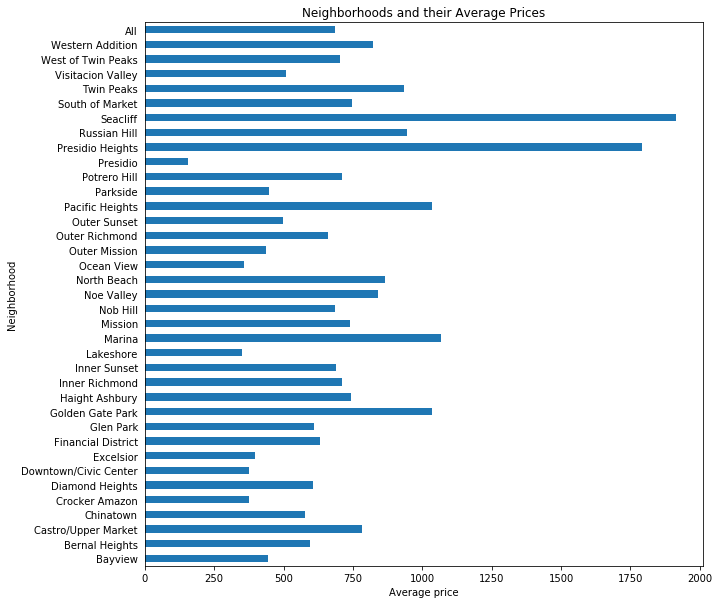

In [67]:
n_price = listings_summary.pivot_table(index='neighbourhood', values='total_price', aggfunc=np.mean, margins=True).round(2)
n_price.plot.barh(title='Neighborhoods and their Average Prices', figsize=(10,10), legend=False)
plt.xlabel('Average price')
plt.ylabel('Neighborhood')
plt.tick_params(left=False)

Based on the average prices of the neighborhoods, we can recommend listings within a certain price range. If someone is looking to spend less than $250 on a listing, we can recommend listings that are in the Presidio neighborhood. Or if someone is looking to spend the average price of all neighborhoods, we could recommend listings in the West of Twin Peaks, Potrero Hill, Outer Richmond, Nob Hill, or Inner Sunset neighborhoods since those neighborhoods are close to the average of all the neighborhoods. 

The Seacliff and Presidio Heights neighborhoods have the highest average prices and may be skewing the average price of all neighborhoods, so we'll check how many listings are in each neighborhood.

**Neighborhoods and their listings**

In [68]:
n_count = listings_summary.groupby('neighbourhood').size()
n_count

neighbourhood
Bayview                  171
Bernal Heights           406
Castro/Upper Market      422
Chinatown                123
Crocker Amazon            55
Diamond Heights           18
Downtown/Civic Center    628
Excelsior                160
Financial District       156
Glen Park                 70
Golden Gate Park           4
Haight Ashbury           379
Inner Richmond           181
Inner Sunset             161
Lakeshore                 58
Marina                   190
Mission                  730
Nob Hill                 246
Noe Valley               325
North Beach              159
Ocean View               109
Outer Mission            164
Outer Richmond           158
Outer Sunset             277
Pacific Heights          156
Parkside                 137
Potrero Hill             232
Presidio                   1
Presidio Heights          27
Russian Hill             176
Seacliff                  25
South of Market          614
Twin Peaks                65
Visitacion Valley         72
